In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import timedelta

data_01 = pd.read_csv('../data/0.1_results_with_calculate_last.csv')
data_02 = pd.read_csv('../data/0.2_results_with_calculate_last.csv')
data_03 = pd.read_csv('../data/0.3_results_with_calculate_last.csv')
data_04 = pd.read_csv('../data/0.4_results_with_calculate_last.csv')
data_05 = pd.read_csv('../data/0.5_results_with_calculate_last.csv')
data_06 = pd.read_csv('../data/0.6_results_with_calculate_last.csv')
data_07 = pd.read_csv('../data/0.7_results_with_calculate_last.csv')
data_08 = pd.read_csv('../data/0.8_results_with_calculate_last.csv')
data_09 = pd.read_csv('../data/0.9_results_with_calculate_last.csv')

frames = [data_01, data_02, data_03, data_04, data_05, data_06, data_07, data_08, data_09]
data_with = pd.concat(frames)

data_01 = pd.read_csv('../data/0.1_results_without_calculate_last.csv')
data_02 = pd.read_csv('../data/0.2_results_without_calculate_last.csv')
data_03 = pd.read_csv('../data/0.3_results_without_calculate_last.csv')
data_04 = pd.read_csv('../data/0.4_results_without_calculate_last.csv')
data_05 = pd.read_csv('../data/0.5_results_without_calculate_last.csv')
data_06 = pd.read_csv('../data/0.6_results_without_calculate_last.csv')
data_07 = pd.read_csv('../data/0.7_results_without_calculate_last.csv')
data_08 = pd.read_csv('../data/0.8_results_without_calculate_last.csv')
data_09 = pd.read_csv('../data/0.9_results_without_calculate_last.csv')

frames = [data_01, data_02, data_03, data_04, data_05, data_06, data_07, data_08, data_09]
data_without = pd.concat(frames)

In [73]:
data_01

,nr,nazwa,pp,numberOfSeeds,seeds,totalNumberOfSeeds,numberOfNodes,steps,infectedTotal,infectedTotalPercentage,computionalTime,limitPercentage
0,6,8,0.1,2,2,250,12591,264,4124,32.753554,"[datetime.timedelta(0, 5, 595197), datetime.ti...",1
1,6,8,0.1,4,4,500,12591,276,4533,36.001906,"[datetime.timedelta(0, 6, 140947), datetime.ti...",1
2,6,8,0.1,8,8,1000,12591,281,5184,41.172266,"[datetime.timedelta(0, 7, 292079), datetime.ti...",1
3,6,8,0.1,16,16,1999,12591,223,6183,49.106505,"[datetime.timedelta(0, 9, 539920), datetime.ti...",1
4,6,8,0.1,2,2,502,12591,490,4538,36.041617,"[datetime.timedelta(0, 5, 603018), datetime.ti...",2
...,...,...,...,...,...,...,...,...,...,...,...,...
1876,4,15,0.1,2,2,622,6229,498,4698,75.421416,"[datetime.timedelta(0, 9, 677230), datetime.ti...",5
1877,4,15,0.1,4,4,1244,6229,449,5318,85.374860,"[datetime.timedelta(0, 11, 308064), datetime.t...",5
1878,4,15,0.1,8,8,2160,6229,362,6229,100.000000,"[datetime.timedelta(0, 14, 387795), datetime.t...",5
1879,4,15,0.1,16,16,2171,6229,199,6229,100.000000,"[datetime.timedelta(0, 20, 643154), datetime.t...",5


In [175]:
# from datetime import timedelta

# x = timedelta(0, 6, 45204568)

# x.total_seconds()

# data_with[data_with['infectedTotalPercentage'] == ]

In [3]:


def changeToDate(x, mapa, unique):
    replaced = x.replace('(', '').replace('[', '').replace(' ', '').replace(')]', '')
    
    if(replaced not in unique):
        unique.append(replaced)

        splited = replaced.split(',')
#         print(splited, 'm', splited[0], 's', splited[1], 'msec', splited[2])

        mapa['m'] += int(splited[0])
        mapa['s'] += int(splited[1])
        mapa['msec'] += int(splited[2])
#         print(mapa)

def convert(x):
    
    temp = x.replace('datetime.timedelta', '').split('),')
#     print('nowy')
    mapa = {'m': 0, 's': 0, 'msec': 0}
    unique = []

    for tmp in temp:        
        changeToDate(tmp, mapa, unique)
        
#     print('koniec z czasem', timedelta(mapa['m'], mapa['s'], mapa['msec']).total_seconds())
    return timedelta(mapa['m'], mapa['s'], mapa['msec']).total_seconds()

#     print([tmp for tmp in temp])
#     print([tmp.apply(lambda x: x.replace('(', '')) for tmp in temp])


# data_with[71:72].apply(lambda x: convert(x['computionalTime']), axis=1)
# data_without[71:72].apply(lambda x: convert(x['computionalTime']), axis=1)

data_with['seconds'] = data_with.apply(lambda x: convert(x['computionalTime']), axis=1)
data_without['seconds'] = data_without.apply(lambda x: convert(x['computionalTime']), axis=1)

# data_with[np.isclose(data_with['infectedTotalPercentage'],95.525154, 0.0001)].apply(lambda x: convert(x['computionalTime']), axis=1)


In [56]:
data_with

,nr,nazwa,pp,numberOfSeeds,seeds,totalNumberOfSeeds,numberOfNodes,steps,infectedTotal,infectedTotalPercentage,computionalTime,limitPercentage,seconds
0,6,8,0.1,2,2,250,12591,264,4124,32.753554,"[datetime.timedelta(0, 5, 595197), datetime.ti...",1,59.083257
1,6,8,0.1,4,4,500,12591,276,4533,36.001906,"[datetime.timedelta(0, 6, 140947), datetime.ti...",1,51.204568
2,6,8,0.1,8,8,1000,12591,281,5184,41.172266,"[datetime.timedelta(0, 7, 292079), datetime.ti...",1,40.390253
3,6,8,0.1,16,16,1999,12591,223,6183,49.106505,"[datetime.timedelta(0, 9, 539920), datetime.ti...",1,33.226255
4,6,8,0.1,2,2,502,12591,490,4538,36.041617,"[datetime.timedelta(0, 5, 603018), datetime.ti...",2,84.508827
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,1,15,0.9,16,16,165,6229,38,6229,100.000000,"[datetime.timedelta(0, 19, 574275), datetime.t...",4,19.673286
1996,1,15,0.9,2,2,128,6229,125,6229,100.000000,"[datetime.timedelta(0, 9, 470666), datetime.ti...",5,9.559978
1997,1,15,0.9,4,4,131,6229,75,6229,100.000000,"[datetime.timedelta(0, 10, 907006), datetime.t...",5,10.983836
1998,1,15,0.9,8,8,143,6229,51,6229,100.000000,"[datetime.timedelta(0, 13, 810188), datetime.t...",5,13.891043


In [3]:
# import matplotlib.pyplot as plt 


# plt.figure();

# fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(30,20))

# net = 

# for nr in [1, 2, 3, 4, 5, 6, 7, 8, 9]:
#     for numberOfSeeds in [2, 4, 8, 16]:
#         for limitPercentage in [2, 3, 4, 5]:
#             for pp in [0.1, 0.2, 0.3]:
#                 subdata_with = data_with[(data_with['nazwa'] == net) & (data_with['nr'] == nr) & (data_with['numberOfSeeds'] == numberOfSeeds) & (data_with['limitPercentage'] == limitPercentage)]
#                 subdata_without = data_without[(data_with['nazwa'] == net) & (data_without['nr'] == nr) & (data_without['numberOfSeeds'] == numberOfSeeds) & (data_without['limitPercentage'] == limitPercentage)]

#     #             subdata_without = data_without[(data_without['nr'] == nr) & (data_without['numberOfSeeds'] == numberOfSeeds) & (data_without['limitPercentage'] == limitPercentage)]
#     #             subdata_with = data_with[(data_with['nr'] == nr) & (data_with['numberOfSeeds'] == numberOfSeeds) & (data_with['limitPercentage'] == limitPercentage)]

#                 ax.scatter(list(range(len(subdata_with.index))), subdata_with['infectedTotalPercentage'], s=1, color='red')
#                 ax.scatter(list(range(len(subdata_without.index))), subdata_without['infectedTotalPercentage'], s=1, color='blue')



<Figure size 432x288 with 0 Axes>

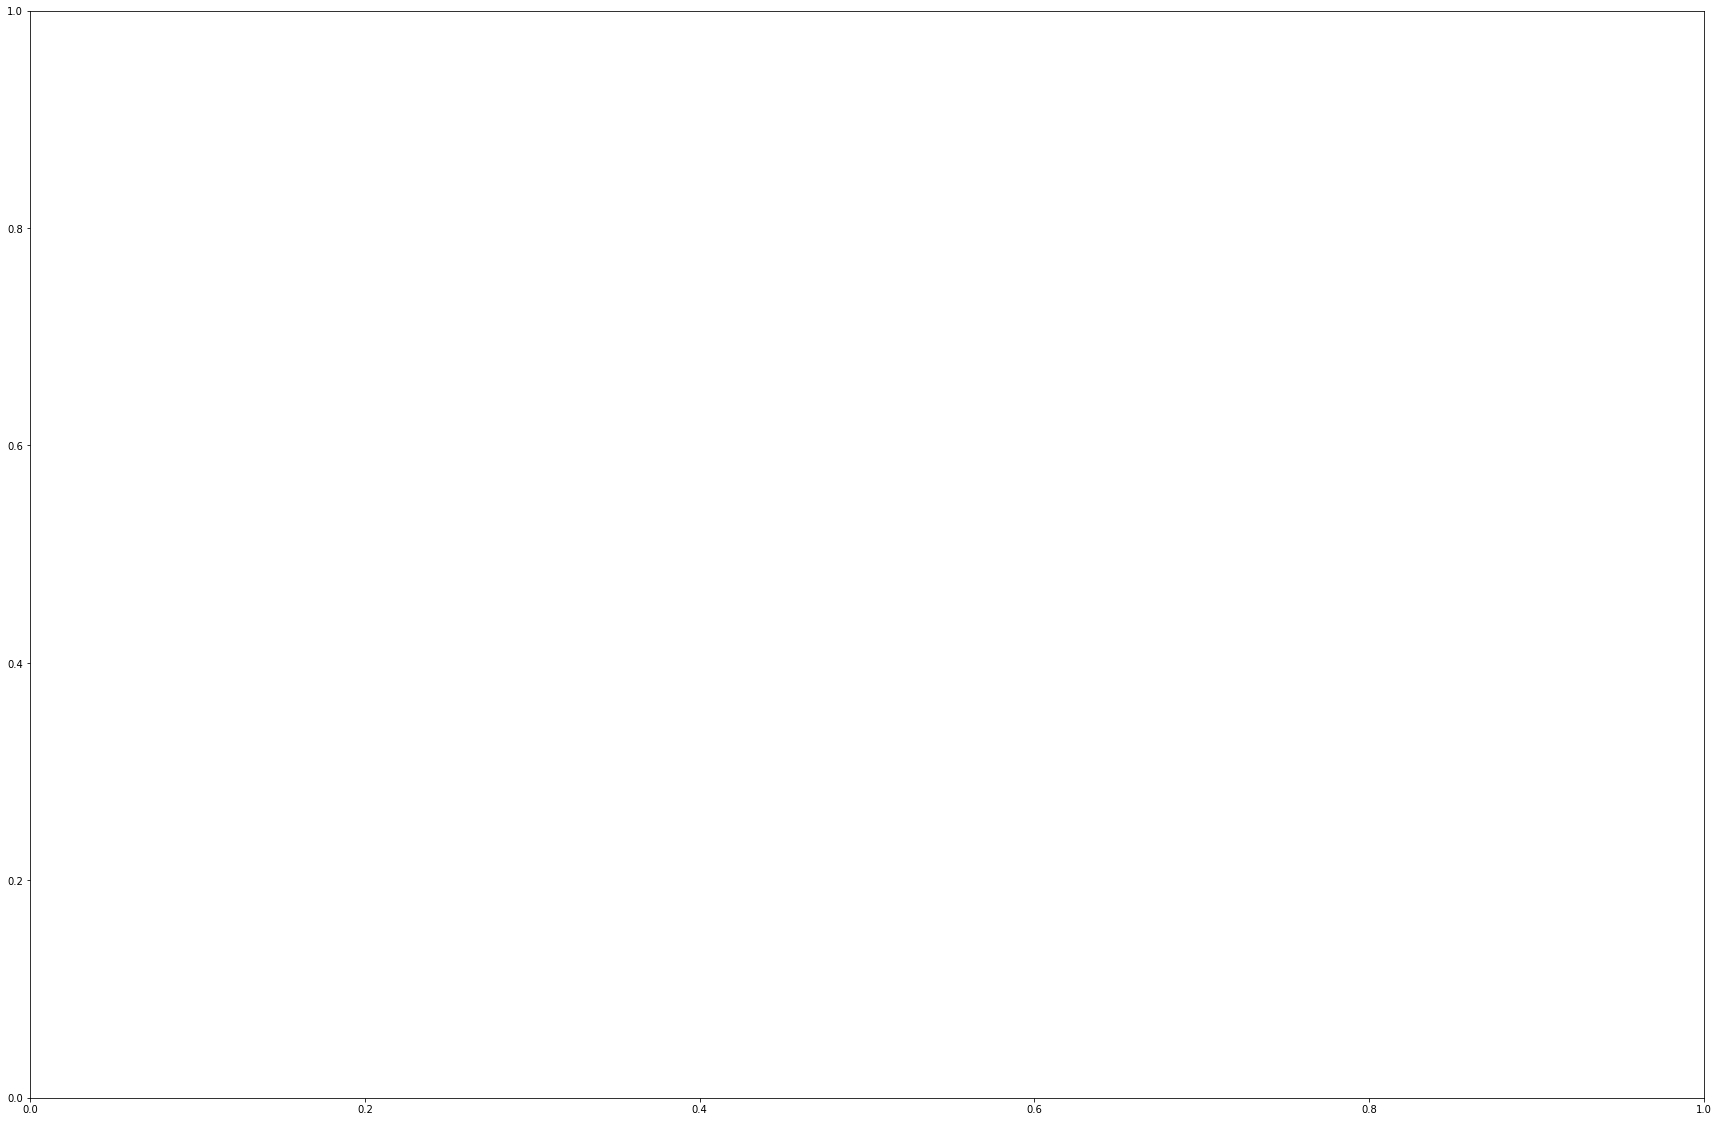

In [27]:
import matplotlib.pyplot as plt 


plt.figure();

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(30,20))

lastRows_with = pd.DataFrame()
lastRows_without = pd.DataFrame()

for net in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]:
    for pp in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
        for numberOfSeeds in [2, 4, 8, 16]:
            for limitPercentage in [1, 2, 3, 4, 5]:
                subdata_with = data_with[(data_with['nazwa'] == net) & (data_with['pp'] == pp) & (data_with['numberOfSeeds'] == numberOfSeeds) & (data_with['limitPercentage'] == limitPercentage)]
                subdata_without = data_without[(data_without['nazwa'] == net) & (data_without['pp'] == pp) & (data_without['numberOfSeeds'] == numberOfSeeds) & (data_without['limitPercentage'] == limitPercentage)]
                
#                 subdata_without = subdata_without.mean()
#                 subdata_with = subdata_with.mean()

                subdata_without = subdata_without.mean()
                subdata_with = subdata_with.mean()

#                 print(subdata_without['infectedTotal'])
#                 print(subdata_with['infectedTotal'])

                temp_without = pd.DataFrame(subdata_without)
                temp_with = pd.DataFrame(subdata_with)
                
                temp = pd.DataFrame({'net': net, 'limitPercentage': limitPercentage, 'pp': pp, 'seed': numberOfSeeds, 'without': [subdata_without['infectedTotalPercentage']], 'with': [subdata_with['infectedTotalPercentage']], 
                                     'increase': [subdata_with['infectedTotalPercentage'] / subdata_without['infectedTotalPercentage']],'secondsWithout': subdata_without['seconds'], 'secondsWith': subdata_with['seconds']})
                
                lastRows_with = lastRows_with.append(temp)

                                    
#                 lastRows_with = lastRows_with.append(temp_with.mean(), ignore_index=True)
#                 lastRows_without = lastRows_without.append(temp_without.mean(), ignore_index=True)

#                 lastRows_with = lastRows_with.append(temp_with)
#                 lastRows_without = lastRows_without.append(temp_without)


In [140]:
lastRows_with = lastRows_with.sort_values('increase')
# lastRows_with = lastRows_with.dropna()
# lastRows_with

<Figure size 432x288 with 0 Axes>

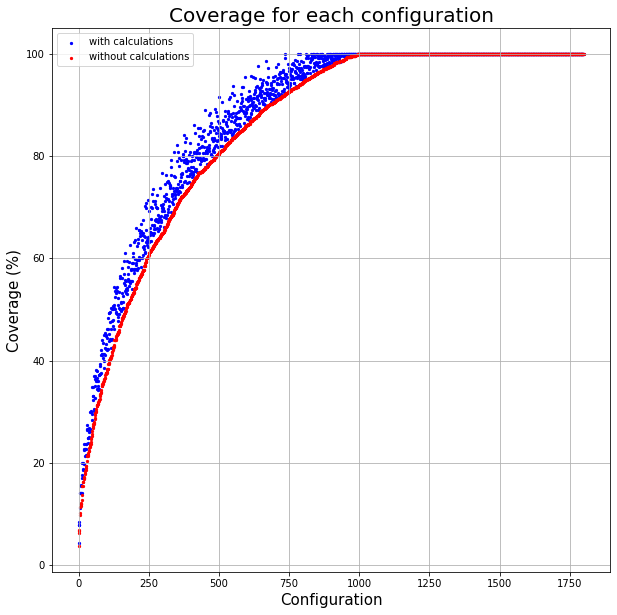

In [11]:
plt.figure();

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))


# ax.scatter(list(range(len(lastRows_with.index))), lastRows_with['infectedTotalPercentage'], s=10, color='red')
# ax.scatter(list(range(len(lastRows_without.index))), lastRows_without['infectedTotalPercentage'], s=5, color='blue')
lastRows_with = lastRows_with.sort_values('without')


ax.scatter(list(range(len(lastRows_with.index))), lastRows_with['with'], s=5, color='blue', label='with calculations')
ax.scatter(list(range(len(lastRows_with.index))), lastRows_with['without'], s=5, color='red', label='without calculations')

# ax[1].scatter(list(range(len(lastRows_with.index))), lastRows_with['secondsWith'], s=5, color='blue')
# ax[1].scatter(list(range(len(lastRows_with.index))), lastRows_with['secondsWithout'], s=5, color='red')

# ax.scatter(list(range(len(lastRows_with.index))), lastRows_with['with'], s=5, color='blue')
# ax[0].scatter(list(range(len(lastRows_with.index))), lastRows_with['increase'], s=5, color='red')

ax.set_xlabel(r'Configuration', fontsize=15)
ax.set_ylabel(r'Coverage (%)', fontsize=15)
ax.set_title('Coverage for each configuration', fontsize=20)

ax.grid(True)

ax.legend(loc='upper left')

plt.show()


<Figure size 432x288 with 0 Axes>

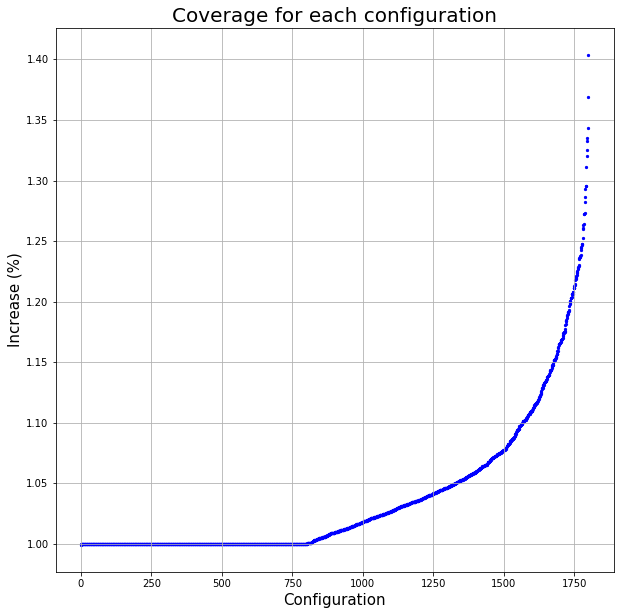

In [9]:
plt.figure();

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))


# ax.scatter(list(range(len(lastRows_with.index))), lastRows_with['infectedTotalPercentage'], s=10, color='red')
# ax.scatter(list(range(len(lastRows_without.index))), lastRows_without['infectedTotalPercentage'], s=5, color='blue')

ax.scatter(list(range(len(lastRows_with.index))), lastRows_with['increase'], s=5, color='blue', label='with calculations')
# ax.scatter(list(range(len(lastRows_with.index))), lastRows_with['without'], s=5, color='red', label='without calculations')

# ax[1].scatter(list(range(len(lastRows_with.index))), lastRows_with['secondsWith'], s=5, color='blue')
# ax[1].scatter(list(range(len(lastRows_with.index))), lastRows_with['secondsWithout'], s=5, color='red')

# ax.scatter(list(range(len(lastRows_with.index))), lastRows_with['with'], s=5, color='blue')
# ax[0].scatter(list(range(len(lastRows_with.index))), lastRows_with['increase'], s=5, color='red')

ax.set_xlabel(r'Configuration', fontsize=15)
ax.set_ylabel(r'Increase (%)', fontsize=15)
ax.set_title('Coverage for each configuration', fontsize=20)

ax.grid(True)

# ax.legend(loc='upper left')

plt.show()


In [7]:
print('Średnie pokrycie dla wszystkich przypadków z przeliczaniem', lastRows_with['with'].mean())
print('Średnie pokrycie dla wszystkich przypadków bez przeliczania', lastRows_with['without'].mean())

Średnie pokrycie dla wszystkich przypadków z przeliczaniem 87.66804590202749
Średnie pokrycie dla wszystkich przypadków bez przeliczania 85.51839051468836


In [31]:
lastRows_with = lastRows_with.dropna()

lastRows_with = lastRows_with.sort_values('increase', ascending=False)
lastRows_with

,net,limitPercentage,pp,seed,without,with,increase,secondsWithout,secondsWith
0,4,1,0.3,4,16.907509,23.725966,1.403280,2.252990,14.832488
0,4,1,0.2,4,10.287391,14.082170,1.368877,2.230006,16.952952
0,4,1,0.4,2,20.441206,27.455981,1.343168,2.281665,11.381303
0,4,1,0.2,8,16.968225,22.657357,1.335281,2.234776,18.946236
0,4,1,0.3,8,26.182959,34.887675,1.332457,2.268792,15.826655
...,...,...,...,...,...,...,...,...,...
0,12,3,0.5,16,100.000000,100.000000,1.000000,1.071800,0.563899
0,14,1,0.5,16,100.000000,100.000000,1.000000,19.160148,7.067284
0,13,1,0.6,8,95.304956,95.298602,0.999933,1.694299,1.061959
0,13,1,0.7,8,98.557814,98.513342,0.999549,1.766649,1.027376


In [39]:
lastRows_with = lastRows_with.sort_values('increase', ascending=True)

print(' ')
print('Wśród 100 najniższych różnic wartość parametru PP która najczęściej się ukazywała to', lastRows_with[1:100]['pp'].value_counts().idxmax())
print('Wśród 100 najniższych różnic wartość parametru limitPercentage która najczęściej się ukazywała to', lastRows_with[1:100]['limitPercentage'].value_counts().idxmax())
print('Wśród 100 najniższych różnic wartość parametru Seed która najczęściej się ukazywała to', lastRows_with[1:100]['seed'].value_counts().idxmax())
print('Wśród 100 najniższych różnic wartość parametru Net która najczęściej się ukazywała to', lastRows_with[1:100]['net'].value_counts().idxmax())

print(' ')
print('Wśród 250 najniższych różnic wartość parametru PP która najczęściej się ukazywała to', lastRows_with[1:250]['pp'].value_counts().idxmax())
print('Wśród 250 najniższych różnic wartość parametru limitPercentage która najczęściej się ukazywała to', lastRows_with[1:250]['limitPercentage'].value_counts().idxmax())
print('Wśród 250 najniższych różnic wartość parametru Seed która najczęściej się ukazywała to', lastRows_with[1:250]['seed'].value_counts().idxmax())
print('Wśród 250 najniższych różnic wartość parametru Net która najczęściej się ukazywała to', lastRows_with[1:250]['net'].value_counts().idxmax())

print(' ')
print('Wśród 500 najniższych różnic wartość parametru PP która najczęściej się ukazywała to', lastRows_with[1:500]['pp'].value_counts().idxmax())
print('Wśród 500 najniższych różnic wartość parametru limitPercentage która najczęściej się ukazywała to', lastRows_with[1:100]['limitPercentage'].value_counts().idxmax())
print('Wśród 500 najniższych różnic wartość parametru Seed która najczęściej się ukazywała to', lastRows_with[1:500]['seed'].value_counts().idxmax())
print('Wśród 500 najniższych różnic wartość parametru Net która najczęściej się ukazywała to', lastRows_with[1:500]['net'].value_counts().idxmax())
print(' ')

lastRows_with = lastRows_with.sort_values('increase', ascending=False)

print('Wśród 100 najwyższych różnic wartość parametru PP która najczęściej się ukazywała to', lastRows_with[1:100]['pp'].value_counts().idxmax())
print('Wśród 100 najwyższych różnic wartość parametru limitPercentage która najczęściej się ukazywała to', lastRows_with[1:100]['limitPercentage'].value_counts().idxmax())
print('Wśród 100 najwyższych różnic wartość parametru Seed która najczęściej się ukazywała to', lastRows_with[1:100]['seed'].value_counts().idxmax())
print('Wśród 100 najwyższych różnic wartość parametru Net która najczęściej się ukazywała to', lastRows_with[1:100]['net'].value_counts().idxmax())
print(' ')

print('Wśród 250 najwyższych różnic wartość parametru PP która najczęściej się ukazywała to', lastRows_with[1:250]['pp'].value_counts().idxmax())
print('Wśród 250 najwyższych różnic wartość parametru limitPercentage która najczęściej się ukazywała to', lastRows_with[1:250]['limitPercentage'].value_counts().idxmax())
print('Wśród 250 najwyższych różnic wartość parametru Seed która najczęściej się ukazywała to', lastRows_with[1:250]['seed'].value_counts().idxmax())
print('Wśród 250 najwyższych różnic wartość parametru Net która najczęściej się ukazywała to', lastRows_with[1:250]['net'].value_counts().idxmax())
print(' ')

print('Wśród 500 najwyższych różnic pokrycia, wartość parametru PP która najczęściej się ukazywała to', lastRows_with[1:500]['pp'].value_counts().idxmax())
print('Wśród 500 najwyższych różnic pokrycia, wartość parametru limitPercentage która najczęściej się ukazywała to', lastRows_with[1:500]['limitPercentage'].value_counts().idxmax())
print('Wśród 500 najwyższych różnic pokrycia, wartość parametru Seed która najczęściej się ukazywała to', lastRows_with[1:500]['seed'].value_counts().idxmax())
print('Wśród 500 najwyższych różnic pokrycia, wartość parametru Net która najczęściej się ukazywała to', lastRows_with[1:500]['net'].value_counts().idxmax())
print(' ')


 
Wśród 100 najniższych różnic wartość parametru PP która najczęściej się ukazywała to 0.7
Wśród 100 najniższych różnic wartość parametru limitPercentage która najczęściej się ukazywała to 3
Wśród 100 najniższych różnic wartość parametru Seed która najczęściej się ukazywała to 16
Wśród 100 najniższych różnic wartość parametru Net która najczęściej się ukazywała to 14
 
Wśród 250 najniższych różnic wartość parametru PP która najczęściej się ukazywała to 0.7
Wśród 250 najniższych różnic wartość parametru limitPercentage która najczęściej się ukazywała to 5
Wśród 250 najniższych różnic wartość parametru Seed która najczęściej się ukazywała to 16
Wśród 250 najniższych różnic wartość parametru Net która najczęściej się ukazywała to 14
 
Wśród 500 najniższych różnic wartość parametru PP która najczęściej się ukazywała to 0.9
Wśród 500 najniższych różnic wartość parametru limitPercentage która najczęściej się ukazywała to 3
Wśród 500 najniższych różnic wartość parametru Seed która najczęściej

<Figure size 432x288 with 0 Axes>

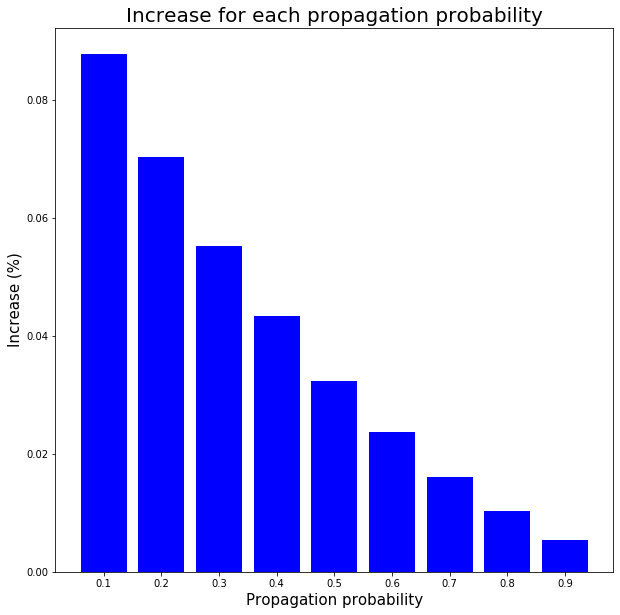

In [58]:
plt.figure();

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))

ax.bar(['0.1'], lastRows_with[lastRows_with['pp'] == 0.1]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['0.2'], lastRows_with[lastRows_with['pp'] == 0.2]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['0.3'], lastRows_with[lastRows_with['pp'] == 0.3]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['0.4'], lastRows_with[lastRows_with['pp'] == 0.4]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['0.5'], lastRows_with[lastRows_with['pp'] == 0.5]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['0.6'], lastRows_with[lastRows_with['pp'] == 0.6]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['0.7'], lastRows_with[lastRows_with['pp'] == 0.7]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['0.8'], lastRows_with[lastRows_with['pp'] == 0.8]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['0.9'], lastRows_with[lastRows_with['pp'] == 0.9]['increase'].mean() - 1, color='blue', label='with calculations')

ax.set_xlabel(r'Propagation probability', fontsize=15)
ax.set_ylabel(r'Increase (%)', fontsize=15)
ax.set_title('Increase for each propagation probability', fontsize=20)

# ax.grid(True)

# ax.legend(loc='upper left')

plt.show()

<Figure size 432x288 with 0 Axes>

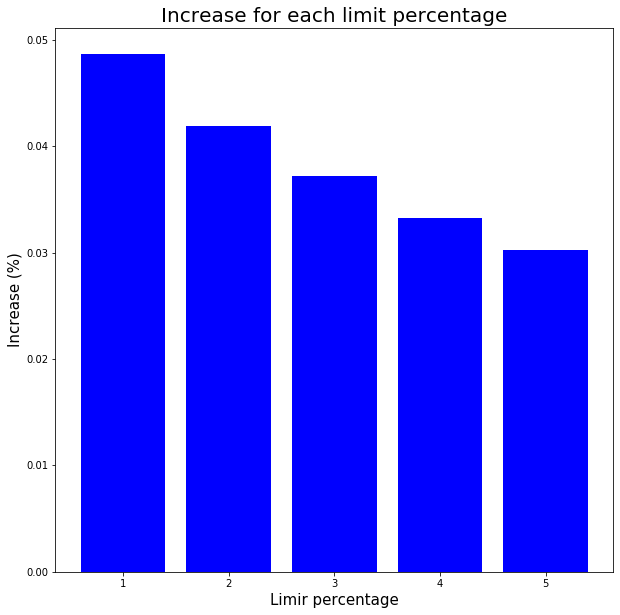

In [62]:
plt.figure();

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))

ax.bar(['1'], lastRows_with[lastRows_with['limitPercentage'] == 1]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['2'], lastRows_with[lastRows_with['limitPercentage'] == 2]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['3'], lastRows_with[lastRows_with['limitPercentage'] == 3]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['4'], lastRows_with[lastRows_with['limitPercentage'] == 4]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['5'], lastRows_with[lastRows_with['limitPercentage'] == 5]['increase'].mean() - 1, color='blue', label='with calculations')

ax.set_xlabel(r'Limit percentage', fontsize=15)
ax.set_ylabel(r'Increase (%)', fontsize=15)
ax.set_title('Increase for each limit percentage', fontsize=20)

# ax.grid(True)

# ax.legend(loc='upper left')

plt.show()

<Figure size 432x288 with 0 Axes>

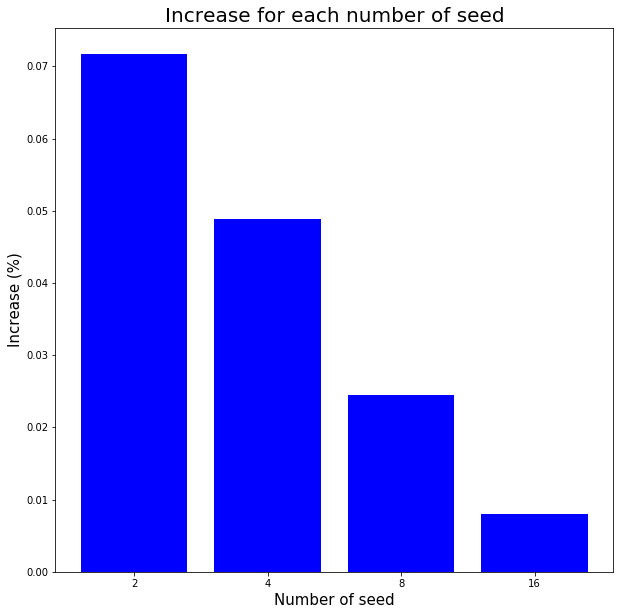

In [68]:
plt.figure();

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))

ax.bar(['1'], lastRows_with[lastRows_with['seed'] == 1]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['2'], lastRows_with[lastRows_with['seed'] == 2]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['4'], lastRows_with[lastRows_with['seed'] == 4]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['8'], lastRows_with[lastRows_with['seed'] == 8]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['16'], lastRows_with[lastRows_with['seed'] == 16]['increase'].mean() - 1, color='blue', label='with calculations')

ax.set_xlabel(r'Number of seed', fontsize=15)
ax.set_ylabel(r'Increase (%)', fontsize=15)
ax.set_title('Increase for each number of seed', fontsize=20)

# ax.grid(True)

# ax.legend(loc='upper left')

plt.show()

<Figure size 432x288 with 0 Axes>

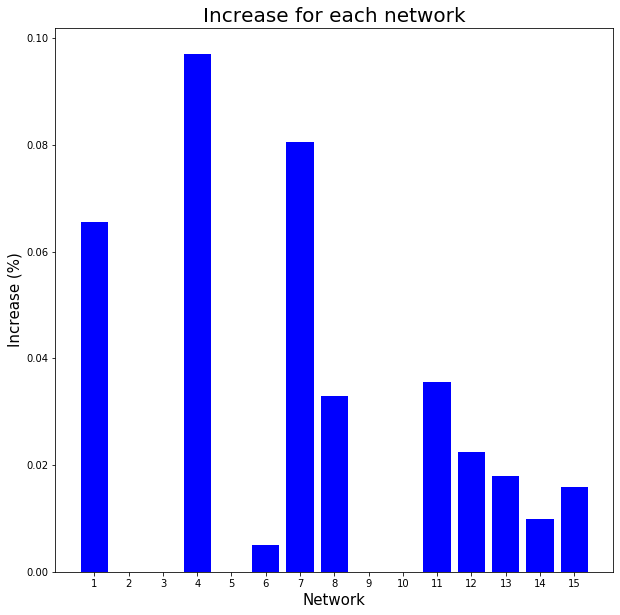

In [75]:
plt.figure();

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))

ax.bar(['1'], lastRows_with[lastRows_with['net'] == 1]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['2'], lastRows_with[lastRows_with['net'] == 2]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['3'], lastRows_with[lastRows_with['net'] == 3]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['4'], lastRows_with[lastRows_with['net'] == 4]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['5'], lastRows_with[lastRows_with['net'] == 5]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['6'], lastRows_with[lastRows_with['net'] == 6]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['7'], lastRows_with[lastRows_with['net'] == 7]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['8'], lastRows_with[lastRows_with['net'] == 8]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['9'], lastRows_with[lastRows_with['net'] == 9]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['10'], lastRows_with[lastRows_with['net'] == 10]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['11'], lastRows_with[lastRows_with['net'] == 11]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['12'], lastRows_with[lastRows_with['net'] == 12]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['13'], lastRows_with[lastRows_with['net'] == 13]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['14'], lastRows_with[lastRows_with['net'] == 14]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['15'], lastRows_with[lastRows_with['net'] == 15]['increase'].mean() - 1, color='blue', label='with calculations')

ax.set_xlabel(r'Network', fontsize=15)
ax.set_ylabel(r'Increase (%)', fontsize=15)
ax.set_title('Increase for each network', fontsize=20)

# ax.grid(True)

# ax.legend(loc='upper left')

plt.show()

<Figure size 432x288 with 0 Axes>

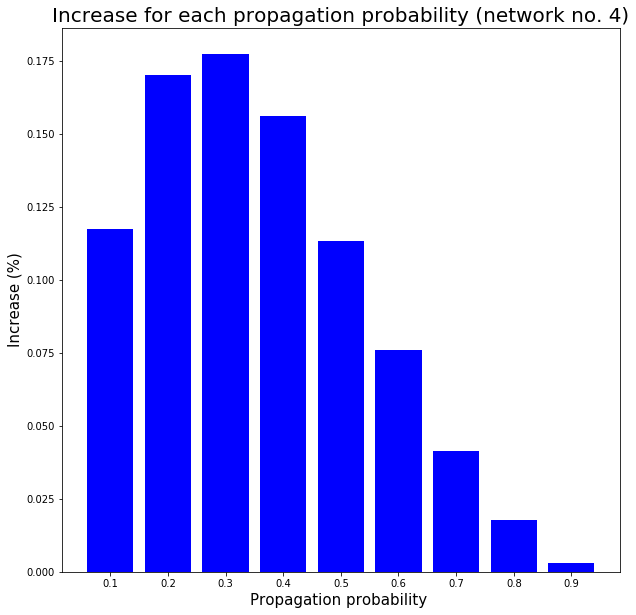

In [92]:
plt.figure();

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))

lastRows_with_1 = lastRows_with[lastRows_with['net'] == 4]

ax.bar(['0.1'], lastRows_with_1[lastRows_with_1['pp'] == 0.1]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['0.2'], lastRows_with_1[lastRows_with_1['pp'] == 0.2]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['0.3'], lastRows_with_1[lastRows_with_1['pp'] == 0.3]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['0.4'], lastRows_with_1[lastRows_with_1['pp'] == 0.4]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['0.5'], lastRows_with_1[lastRows_with_1['pp'] == 0.5]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['0.6'], lastRows_with_1[lastRows_with_1['pp'] == 0.6]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['0.7'], lastRows_with_1[lastRows_with_1['pp'] == 0.7]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['0.8'], lastRows_with_1[lastRows_with_1['pp'] == 0.8]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['0.9'], lastRows_with_1[lastRows_with_1['pp'] == 0.9]['increase'].mean() - 1, color='blue', label='with calculations')

ax.set_xlabel(r'Propagation probability ', fontsize=15)
ax.set_ylabel(r'Increase (%)', fontsize=15)
ax.set_title('Increase for each propagation probability (network no. 4)', fontsize=20)

# ax.grid(True)

# ax.legend(loc='upper left')

plt.show()

<Figure size 432x288 with 0 Axes>

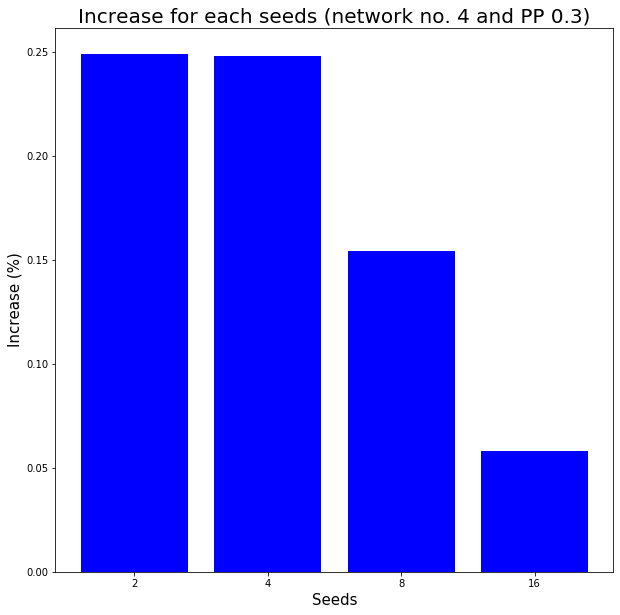

In [93]:
plt.figure();

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))

lastRows_with_1 = lastRows_with[(lastRows_with['net'] == 4) & (lastRows_with['pp'] == 0.3)]

ax.bar(['1'], lastRows_with_1[lastRows_with_1['seed'] == 1]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['2'], lastRows_with_1[lastRows_with_1['seed'] == 2]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['4'], lastRows_with_1[lastRows_with_1['seed'] == 4]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['8'], lastRows_with_1[lastRows_with_1['seed'] == 8]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['16'], lastRows_with_1[lastRows_with_1['seed'] == 16]['increase'].mean() - 1, color='blue', label='with calculations')

ax.set_xlabel(r'Seeds', fontsize=15)
ax.set_ylabel(r'Increase (%)', fontsize=15)
ax.set_title('Increase for each seeds (network no. 4 and PP 0.3)', fontsize=20)

# ax.grid(True)

# ax.legend(loc='upper left')

plt.show()

<Figure size 432x288 with 0 Axes>

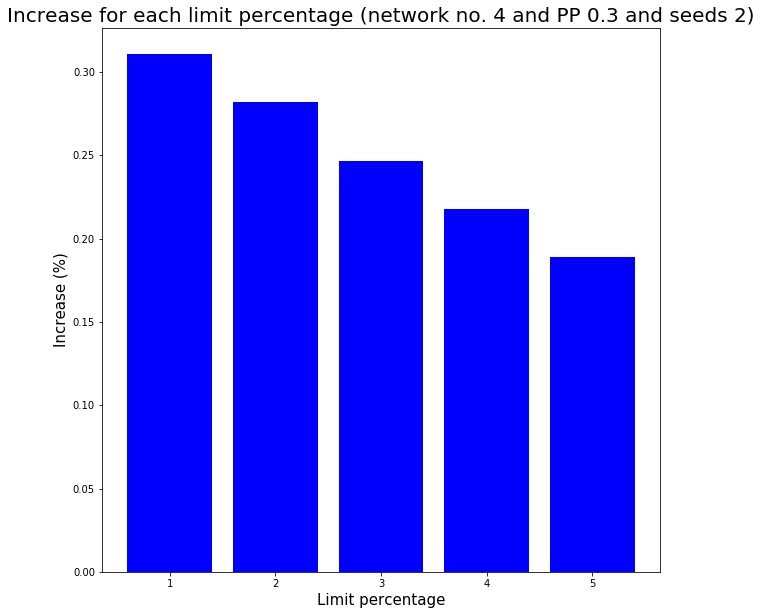

In [94]:
plt.figure();

fig, ax = plt.subplots(ncols=1, nrows=1, figsize=(10,10))

lastRows_with_1 = lastRows_with[(lastRows_with['net'] == 4) & (lastRows_with['pp'] == 0.3) & (lastRows_with['seed'] == 2)]

ax.bar(['1'], lastRows_with_1[lastRows_with_1['limitPercentage'] == 1]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['2'], lastRows_with_1[lastRows_with_1['limitPercentage'] == 2]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['3'], lastRows_with_1[lastRows_with_1['limitPercentage'] == 3]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['4'], lastRows_with_1[lastRows_with_1['limitPercentage'] == 4]['increase'].mean() - 1, color='blue', label='with calculations')
ax.bar(['5'], lastRows_with_1[lastRows_with_1['limitPercentage'] == 5]['increase'].mean() - 1, color='blue', label='with calculations')

ax.set_xlabel(r'Limit percentage', fontsize=15)
ax.set_ylabel(r'Increase (%)', fontsize=15)
ax.set_title('Increase for each limit percentage (network no. 4 and PP 0.3 and seeds 2)', fontsize=20)

# ax.grid(True)

# ax.legend(loc='upper left')

plt.show()